# Obama vs. Trump Administration Gun Violence Combined Data

   ## Firearm Murders by year

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dependencies
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [3]:
# Store filepath in a variable
crime_df = pd.read_excel('FBI_UCR_DATA/HomicideData.xlsx')
crime_df

,Weapons,2014,2015,2016,2017,2018
0,Total,12278,13780,15318,15195,14123
1,Total_firearms,7803,9103,10372,11006,10265
2,Handguns,5342,6176,6762,7051,6603
3,Rifles,235,215,300,390,297
4,Shotguns,238,247,247,264,235
5,Other guns,88,151,172,180,167
6,Firearms_not_stated,1900,2314,2891,3121,2963
7,Knives/cutting_instruments,1545,1525,1558,1609,1515
8,Blunt_objects,431,436,464,472,443
9,Personal_weapons,668,647,664,710,672


In [4]:
# find means

crime_df.rename(columns = {2014: "Year2014", 2015: "Year2015", 2016: "Year2016", 2017: "Year2017", 2018: "Year2018"}, inplace=True)

crime_df.head()

,Weapons,Year2014,Year2015,Year2016,Year2017,Year2018
0,Total,12278,13780,15318,15195,14123
1,Total_firearms,7803,9103,10372,11006,10265
2,Handguns,5342,6176,6762,7051,6603
3,Rifles,235,215,300,390,297
4,Shotguns,238,247,247,264,235


In [5]:
Obama_average_15_16 = ((crime_df["Year2015"] + crime_df["Year2016"])/2).round().astype(int)

Obama_average_15_16

0     14549
1      9738
2      6469
3       258
4       247
5       162
6      2602
7      1542
8       450
9       656
10       10
11        1
12       70
13       94
14       10
15       96
16       98
17     1784
dtype: int64

In [6]:
trump_average_17_18 = ((crime_df["Year2017"] + crime_df["Year2018"])/2).round().astype(int)

trump_average_17_18

0     14659
1     10636
2      6827
3       344
4       250
5       174
6      3042
7      1562
8       458
9       691
10       10
11        2
12       84
13       94
14        8
15       80
16      100
17      934
dtype: int64

In [7]:
crime_df["obama_mean"]=Obama_average_15_16

In [8]:
crime_df

,Weapons,Year2014,Year2015,Year2016,Year2017,Year2018,obama_mean
0,Total,12278,13780,15318,15195,14123,14549
1,Total_firearms,7803,9103,10372,11006,10265,9738
2,Handguns,5342,6176,6762,7051,6603,6469
3,Rifles,235,215,300,390,297,258
4,Shotguns,238,247,247,264,235,247
5,Other guns,88,151,172,180,167,162
6,Firearms_not_stated,1900,2314,2891,3121,2963,2602
7,Knives/cutting_instruments,1545,1525,1558,1609,1515,1542
8,Blunt_objects,431,436,464,472,443,450
9,Personal_weapons,668,647,664,710,672,656


In [9]:
crime_df["trump_mean"]=trump_average_17_18

In [10]:
crime_df

,Weapons,Year2014,Year2015,Year2016,Year2017,Year2018,obama_mean,trump_mean
0,Total,12278,13780,15318,15195,14123,14549,14659
1,Total_firearms,7803,9103,10372,11006,10265,9738,10636
2,Handguns,5342,6176,6762,7051,6603,6469,6827
3,Rifles,235,215,300,390,297,258,344
4,Shotguns,238,247,247,264,235,247,250
5,Other guns,88,151,172,180,167,162,174
6,Firearms_not_stated,1900,2314,2891,3121,2963,2602,3042
7,Knives/cutting_instruments,1545,1525,1558,1609,1515,1542,1562
8,Blunt_objects,431,436,464,472,443,450,458
9,Personal_weapons,668,647,664,710,672,656,691


In [11]:
#averages = crime_df[["Weapons", "obama_mean", "trump_mean"]]
averages = crime_df.loc[:,["Weapons", "obama_mean", "trump_mean"]]
averages

,Weapons,obama_mean,trump_mean
0,Total,14549,14659
1,Total_firearms,9738,10636
2,Handguns,6469,6827
3,Rifles,258,344
4,Shotguns,247,250
5,Other guns,162,174
6,Firearms_not_stated,2602,3042
7,Knives/cutting_instruments,1542,1562
8,Blunt_objects,450,458
9,Personal_weapons,656,691


In [12]:
means = averages.loc[averages["Weapons"] == "Total_firearms"]
means

,Weapons,obama_mean,trump_mean
1,Total_firearms,9738,10636


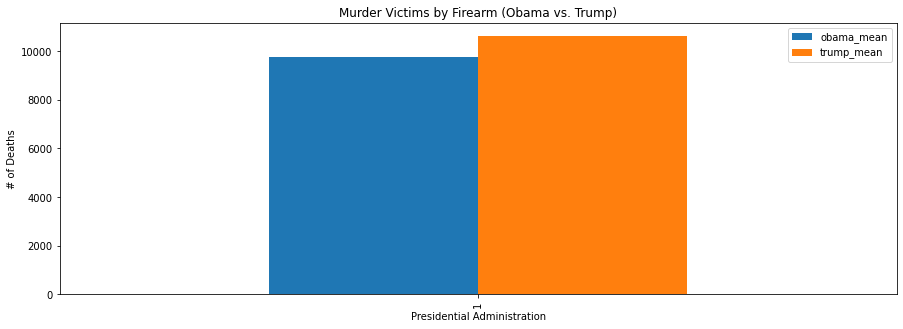

<Figure size 432x288 with 0 Axes>

In [13]:
means.plot(kind="bar", figsize=(15,5))

plt.title("Murder Victims by Firearm (Obama vs. Trump)")

plt.xlabel("Presidential Administration")

plt.ylabel("# of Deaths")


plt.show()
plt.tight_layout()

In [14]:
means_obama = averages.loc[averages["Weapons"] == "Total_firearms", ["Weapons", "obama_mean"]]

means_obama

,Weapons,obama_mean
1,Total_firearms,9738


In [15]:
crime_df.iloc[1]



Weapons       Total_firearms
Year2014                7803
Year2015                9103
Year2016               10372
Year2017               11006
Year2018               10265
obama_mean              9738
trump_mean             10636
Name: 1, dtype: object

In [16]:
crime_firearms_df = crime_df.set_index("Weapons")
crime_firearms_df.head()

,Year2014,Year2015,Year2016,Year2017,Year2018,obama_mean,trump_mean
Weapons,,,,,,,
Total,12278,13780,15318,15195,14123,14549,14659
Total_firearms,7803,9103,10372,11006,10265,9738,10636
Handguns,5342,6176,6762,7051,6603,6469,6827
Rifles,235,215,300,390,297,258,344
Shotguns,238,247,247,264,235,247,250


In [17]:
firearms_obama = crime_firearms_df.loc[["Total","Total_firearms"], ["Year2015", "Year2016"]]

print(firearms_obama)

                Year2015  Year2016
Weapons                           
Total              13780     15318
Total_firearms      9103     10372


In [18]:
firearms_obama["firearms_mean"] = ((firearms_obama["Year2015"] + firearms_obama["Year2016"])/2).round().astype(int)
firearms_obama

,Year2015,Year2016,firearms_mean
Weapons,,,
Total,13780,15318,14549
Total_firearms,9103,10372,9738


In [19]:
firearms_trump = crime_firearms_df.loc[["Total","Total_firearms"], ["Year2017", "Year2018"]]

print(firearms_trump)

                Year2017  Year2018
Weapons                           
Total              15195     14123
Total_firearms     11006     10265


In [20]:
obama_df = pd.DataFrame(crime_df, columns = ["Weapons", "Year2015", "Year2016"])

obama_df


,Weapons,Year2015,Year2016
0,Total,13780,15318
1,Total_firearms,9103,10372
2,Handguns,6176,6762
3,Rifles,215,300
4,Shotguns,247,247
5,Other guns,151,172
6,Firearms_not_stated,2314,2891
7,Knives/cutting_instruments,1525,1558
8,Blunt_objects,436,464
9,Personal_weapons,647,664


   ## Firearm Murders by State

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Import Dependencies
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [23]:
# Store filepath in a variable 2015
states2015_df = pd.read_excel('FBI_UCR_DATA/Murder2015.xlsx')
states2015_df.head()

,State,Total_murders,Total_firearms,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,3,3,1,0,1,1,0,0,0
1,Alaska,57,39,12,2,1,24,7,8,3
2,Arizona,278,171,128,4,3,36,42,55,10
3,Arkansas,164,110,51,10,4,45,18,30,6
4,California,1861,1275,855,34,33,353,263,233,90


In [24]:
#Rename columns 2015
states2015_df.rename(columns = {"Total_murders": "Total_murders2015", "Total_firearms": "Total_firearms2015"}, inplace = True)

states2015_df.head()

,State,Total_murders2015,Total_firearms2015,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,3,3,1,0,1,1,0,0,0
1,Alaska,57,39,12,2,1,24,7,8,3
2,Arizona,278,171,128,4,3,36,42,55,10
3,Arkansas,164,110,51,10,4,45,18,30,6
4,California,1861,1275,855,34,33,353,263,233,90


In [25]:
# sift columns 2015

data2015 = states2015_df [["State", "Total_murders2015", "Total_firearms2015"]]

data2015.head()

,State,Total_murders2015,Total_firearms2015
0,Alabama,3,3
1,Alaska,57,39
2,Arizona,278,171
3,Arkansas,164,110
4,California,1861,1275


In [26]:
# Store filepath in a variable 2016
states2016_df = pd.read_excel('FBI_UCR_DATA/Murder2016.xlsx')
states2016_df.head()

,State,Total_murders,Total_firearms,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,3,1,0,0,0,1,0,2,0
1,Alaska,52,43,12,4,1,26,3,6,0
2,Arizona,336,227,156,16,10,45,40,63,6
3,Arkansas,209,151,72,11,3,65,25,25,8
4,California,1930,1368,930,37,36,365,280,193,89


In [27]:
#Rename columns 2016
states2016_df.rename(columns = {"Total_murders": "Total_murders2016", "Total_firearms": "Total_firearms2016"}, inplace = True)

states2016_df.head()

,State,Total_murders2016,Total_firearms2016,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,3,1,0,0,0,1,0,2,0
1,Alaska,52,43,12,4,1,26,3,6,0
2,Arizona,336,227,156,16,10,45,40,63,6
3,Arkansas,209,151,72,11,3,65,25,25,8
4,California,1930,1368,930,37,36,365,280,193,89


In [28]:
# sift columns 2016

data2016 = states2016_df [["State", "Total_murders2016", "Total_firearms2016"]]

data2016.head()

,State,Total_murders2016,Total_firearms2016
0,Alabama,3,1
1,Alaska,52,43
2,Arizona,336,227
3,Arkansas,209,151
4,California,1930,1368


In [29]:
#Combine dataset into a single dataset 2015 2016

obama_merge_df = pd.merge(data2015, data2016, on="State")

#Display datatable for preview

obama_merge_df.head()

,State,Total_murders2015,Total_firearms2015,Total_murders2016,Total_firearms2016
0,Alabama,3,3,3,1
1,Alaska,57,39,52,43
2,Arizona,278,171,336,227
3,Arkansas,164,110,209,151
4,California,1861,1275,1930,1368


In [30]:
# calculate obama total murders for years 2015 and 2016

Obama_total_murders_15_16 = ((obama_merge_df["Total_murders2015"] + obama_merge_df["Total_murders2016"])/2).round().astype(int)
Obama_total_murders_15_16.head()

0       3
1      54
2     307
3     186
4    1896
dtype: int64

In [31]:
# calculate obama total firearms for years 2015 and 2016


Obama_total_firearms_15_16 = ((obama_merge_df["Total_firearms2015"] + obama_merge_df["Total_firearms2016"])/2).round().astype(int)
Obama_total_firearms_15_16.head()

0       2
1      41
2     199
3     130
4    1322
dtype: int64

In [32]:
obama_merge_df["obama_murder_mean"]=Obama_total_murders_15_16

In [33]:
obama_merge_df.head()

,State,Total_murders2015,Total_firearms2015,Total_murders2016,Total_firearms2016,obama_murder_mean
0,Alabama,3,3,3,1,3
1,Alaska,57,39,52,43,54
2,Arizona,278,171,336,227,307
3,Arkansas,164,110,209,151,186
4,California,1861,1275,1930,1368,1896


In [34]:
obama_merge_df["obama_firearms_mean"]=Obama_total_firearms_15_16

In [35]:
obama_merge_df.head()

,State,Total_murders2015,Total_firearms2015,Total_murders2016,Total_firearms2016,obama_murder_mean,obama_firearms_mean
0,Alabama,3,3,3,1,3,2
1,Alaska,57,39,52,43,54,41
2,Arizona,278,171,336,227,307,199
3,Arkansas,164,110,209,151,186,130
4,California,1861,1275,1930,1368,1896,1322


In [36]:
# obama1 = obama_merge_df.groupby("State").sum()["obama_murder_mean"]
# total_murder_bar = pd.DataFrame(obama1)

# regbar = total_murder_bar.plot.bar(legend=False,rot=80)
# plt.title("Total Number of Murders by State")
# plt.xlabel("State")
# plt.ylabel("obama_murder_mean")


In [37]:
# obama2 = obama_merge_df.groupby("State").sum()["obama_firearms_mean"]
# total_firearms_bar = pd.DataFrame(obama2)

# regbar = total_firearms_bar.plot.bar(legend=False,rot=80)
# plt.title("Total Number of firearms by State")
# plt.xlabel("State")
# plt.ylabel("obama_firearms_mean")


In [38]:
# Store filepath in a variable 2017
states2017_df = pd.read_excel('FBI_UCR_DATA/Murder2017.xlsx')
states2017_df.head()

,State,Total_murders,Total_firearms,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,2,1,0,0,0,1,0,1,0
1,Alaska,62,37,7,3,3,24,13,8,4
2,Arizona,404,249,162,8,9,70,50,93,12
3,Arkansas,250,168,92,11,4,61,23,52,7
4,California,1830,1274,886,37,34,317,258,195,103


In [39]:
#Rename columns 2017
states2017_df.rename(columns = {"Total_murders": "Total_murders2017", "Total_firearms": "Total_firearms2017"}, inplace = True)

states2017_df.head()

,State,Total_murders2017,Total_firearms2017,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,2,1,0,0,0,1,0,1,0
1,Alaska,62,37,7,3,3,24,13,8,4
2,Arizona,404,249,162,8,9,70,50,93,12
3,Arkansas,250,168,92,11,4,61,23,52,7
4,California,1830,1274,886,37,34,317,258,195,103


In [40]:
# sift columns 2017

data2017 = states2017_df [["State", "Total_murders2017", "Total_firearms2017"]]

data2017.head()

,State,Total_murders2017,Total_firearms2017
0,Alabama,2,1
1,Alaska,62,37
2,Arizona,404,249
3,Arkansas,250,168
4,California,1830,1274


In [41]:
# Store filepath in a variable 2018
states2018_df = pd.read_excel('FBI_UCR_DATA/Murder2018.xlsx')
states2018_df.head()

,State,Total_murders,Total_firearms,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,2,2,2,0,0,0,0,0,0
1,Alaska,47,31,7,3,0,21,8,3,5
2,Arizona,339,203,139,12,6,46,45,87,4
3,Arkansas,218,156,66,6,5,79,17,38,7
4,California,1739,1177,834,24,27,292,252,223,87


In [42]:
#Rename columns 2018
states2018_df.rename(columns = {"Total_murders": "Total_murders2018", "Total_firearms": "Total_firearms2018"}, inplace = True)

states2018_df.head()

,State,Total_murders2018,Total_firearms2018,Hand_guns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Other_weapons,Hands_fists
0,Alabama,2,2,2,0,0,0,0,0,0
1,Alaska,47,31,7,3,0,21,8,3,5
2,Arizona,339,203,139,12,6,46,45,87,4
3,Arkansas,218,156,66,6,5,79,17,38,7
4,California,1739,1177,834,24,27,292,252,223,87


In [43]:
# sift columns 2018

data2018 = states2018_df [["State", "Total_murders2018", "Total_firearms2018"]]

data2018.head()

,State,Total_murders2018,Total_firearms2018
0,Alabama,2,2
1,Alaska,47,31
2,Arizona,339,203
3,Arkansas,218,156
4,California,1739,1177


In [44]:
#Combine dataset into a single dataset 2017 2018

trump_merge_df = pd.merge(data2017, data2018, on="State")

#Display datatable for preview

trump_merge_df.head()

,State,Total_murders2017,Total_firearms2017,Total_murders2018,Total_firearms2018
0,Alabama,2,1,2,2
1,Alaska,62,37,47,31
2,Arizona,404,249,339,203
3,Arkansas,250,168,218,156
4,California,1830,1274,1739,1177


In [45]:
# calculate trump total murders for years 2017 and 2018

trump_total_murders_17_18 = ((trump_merge_df["Total_murders2017"] + trump_merge_df["Total_murders2018"])/2).round().astype(int)
trump_total_murders_17_18.head()

0       2
1      54
2     372
3     234
4    1784
dtype: int64

In [46]:
# calculate trump total firearms for years 2017 and 2018

trump_total_firearms_17_18 = ((trump_merge_df["Total_firearms2017"] + trump_merge_df["Total_firearms2018"])/2).round().astype(int)
trump_total_firearms_17_18.head()

0       2
1      34
2     226
3     162
4    1226
dtype: int64

In [47]:
trump_merge_df["trump_murder_mean"]=trump_total_murders_17_18

In [48]:
trump_merge_df.head()

,State,Total_murders2017,Total_firearms2017,Total_murders2018,Total_firearms2018,trump_murder_mean
0,Alabama,2,1,2,2,2
1,Alaska,62,37,47,31,54
2,Arizona,404,249,339,203,372
3,Arkansas,250,168,218,156,234
4,California,1830,1274,1739,1177,1784


In [49]:
trump_merge_df["trump_firearms_mean"]=trump_total_firearms_17_18

In [50]:
trump_merge_df.head(10)

,State,Total_murders2017,Total_firearms2017,Total_murders2018,Total_firearms2018,trump_murder_mean,trump_firearms_mean
0,Alabama,2,1,2,2,2,2
1,Alaska,62,37,47,31,54,34
2,Arizona,404,249,339,203,372,226
3,Arkansas,250,168,218,156,234,162
4,California,1830,1274,1739,1177,1784,1226
5,Colorado,218,137,207,147,212,142
6,Connecticut,102,72,83,54,92,63
7,Delaware,52,44,48,40,50,42
8,District of Columbia,116,90,151,120,134,105
9,Georgia,672,542,568,460,620,501


In [51]:
# trump1 = trump_merge_df.groupby("State").sum()["trump_murder_mean"]
# trump_total_murder_bar = pd.DataFrame(trump1)

# regbar = trump_total_murder_bar.plot.bar(legend=False,rot=80)
# plt.title("Total Number of Murders by State")
# plt.xlabel("State")
# plt.ylabel("trump_murder_mean")

In [52]:
# trump2 = trump_merge_df.groupby("State").sum()["trump_firearms_mean"]
# trump_total_firearms_bar = pd.DataFrame(trump2)

# regbar = trump_total_firearms_bar.plot.bar(legend=False,rot=80)
# plt.title("Total Number of firearms by State")
# plt.xlabel("State")
# plt.ylabel("trump_murder_mean")


In [53]:
obama_trump_merge_df = pd.merge(obama_merge_df, trump_merge_df, on="State")
obama_trump_merge_df.head()

,State,Total_murders2015,Total_firearms2015,Total_murders2016,Total_firearms2016,obama_murder_mean,obama_firearms_mean,Total_murders2017,Total_firearms2017,Total_murders2018,Total_firearms2018,trump_murder_mean,trump_firearms_mean
0,Alabama,3,3,3,1,3,2,2,1,2,2,2,2
1,Alaska,57,39,52,43,54,41,62,37,47,31,54,34
2,Arizona,278,171,336,227,307,199,404,249,339,203,372,226
3,Arkansas,164,110,209,151,186,130,250,168,218,156,234,162
4,California,1861,1275,1930,1368,1896,1322,1830,1274,1739,1177,1784,1226


In [54]:
firearms_mean = obama_trump_merge_df[["State", "obama_firearms_mean", "trump_firearms_mean"]]
firearms_mean

,State,obama_firearms_mean,trump_firearms_mean
0,Alabama,2,2
1,Alaska,41,34
2,Arizona,199,226
3,Arkansas,130,162
4,California,1322,1226
5,Colorado,126,142
6,Connecticut,60,63
7,Delaware,46,42
8,District of Columbia,113,105
9,Georgia,493,501


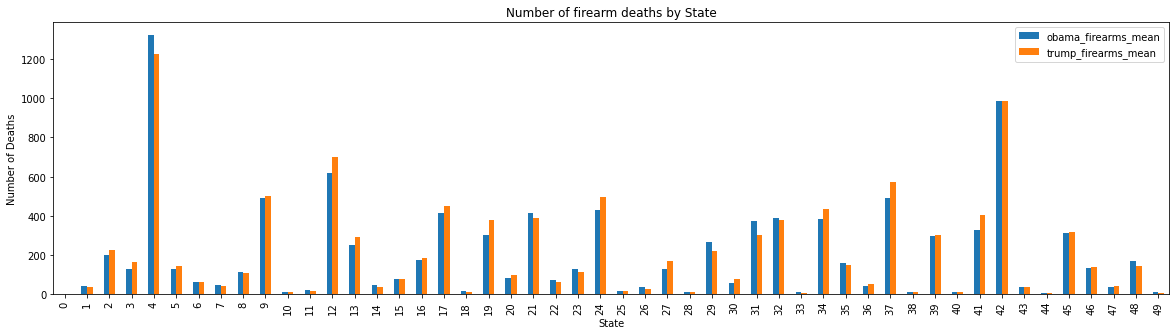

<Figure size 432x288 with 0 Axes>

In [55]:
firearms_mean.plot(kind="bar", figsize=(20,5))
plt.title("Number of firearm deaths by State")
plt.xlabel("State")
plt.ylabel("Number of Deaths")
plt.show()
plt.tight_layout()